In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib import cm # for colormaps

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

In [2]:
# defining parameters
m = 1 #cash-on-hand
v = 10 #disutility of labor
eps = 0.3 #elasticity of labor supply
tau_0 = 0.4 #standard labor income tax
tau_1 = 0.1 #top bracket labor income tax
kappa = 0.4 #cut-off for top labor income tax
w = 1

In [3]:
# Defining utility

def utility(c,l):
    u = np.log(c)-v*l**(1+1/eps)/(1+1/eps)
    return u

In [4]:
def budget_constraint(l,w):
    con = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-kappa,0))
    return con

In [5]:
# Defining equality 

def eq(l,w):
    c = budget_constraint(l,w)
    return -utility(c,l)

In [6]:
res = optimize.minimize_scalar(eq,bounds=(0,1),args=(w),method="bounded")
print(res.message)
l_star = res.x
c_star = budget_constraint(l_star,w)
utility_opt = utility(c_star,l_star)

Solution found.


In [20]:
# Results

print(f'Optimal labour supply: {l_star:.2f}')
print(f'Optimal consumption: {c_star:.2f}')
print(f'Utility: {utility_opt:.2f}')

Optimal labour supply: 1.00
Optimal consumption: 1.00
Utility: 0.17


In [8]:
#question 2

N=1000
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
c_values = np.empty(N)

for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(eq,bounds=(0,1),args=(w),method="bounded")
    l_values[i] = result.x
    c_values[i] = budget_constraint(l_values[i],w)

<function matplotlib.pyplot.show(*args, **kw)>

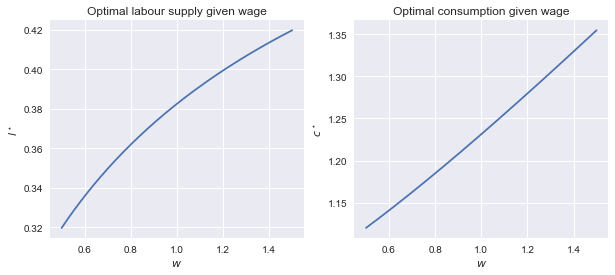

In [9]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,4))

#subplot 1
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_values,l_values)


ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

#subplot 2
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_values, c_values)


ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show

In [10]:
# question 3
def tax_rev(w_values,l_values,tau_0,tau_1,kappa):
    rev = np.sum(tau_0*w_values*l_values + tau_1*np.max(w_values*l_values-kappa,0))
    return rev

print(f'The total tax revenue is equal to: {tax_rev(w_values,l_values,tau_0,tau_1,kappa):.2f}')

The total tax revenue is equal to: 177.54


In [25]:
# question 4
eps = 0.1

l_values_new = np.empty(N)
for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(eq,bounds=(0,1),args=(w),method="bounded")
    l_values[i] = result.x
    c_values[i] = budget_constraint(l_values[i],w)
    
print(f'The total tax revenue is equal to: {tax_rev(w_values,l_values_new,tau_0,tau_1,kappa):.2f}')

The total tax revenue is equal to: -40.00


In [15]:
def tax_opt(x):
    tau_0 = x[0]
    tau_1 = x[1]
    kappa = x[2]
    w = x[3]
    l = x[4]
    rev = np.sum(tau_0*w*l + tau_1*np.max(w*l-kappa,0))
    return rev

def objective(x):
    return -tax_opt(x)

In [16]:
def budget_constraint_tax(x):
    tau_0 = x[2]
    tau_1 = x[3]
    kappa = x[4]
    con = m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3]*np.max(x[0]*x[1]-x[4],0))
    return con

In [17]:
def eq_tax(x):
    w = x[0]
    l = x[1]
    c = budget_constraint_tax(x)
    return -objective(x)

In [18]:

x0 = [1, 1, 1, 1, 1]
constraint = ({"type":"ineq","fun":budget_constraint_tax})
bounds = ((0.5,1.5),(0,1),(0,1),(0,1),(0,1))

tax_res = optimize.minimize(eq_tax, x0, bounds=bounds,constraints=constraint, method='SLSQP')
print(tax_res.message)
w_star = tax_res.x[0]
l_star = tax_res.x[1]
tau_0_star = tax_res.x[2]
tau_1_star = tax_res.x[3]
kappa_star = tax_res.x[4]
c_star = budget_constraint_tax(tax_res.x)
utility_opt_tax = utility(c_star,l_star)
tax_rev_opt = tax_rev(w_values,l_values,tau_0_star,tau_1_star,kappa_star)


Optimization terminated successfully.


In [22]:
print(f'Standard labor income is equal to: {tau_0_star:.2f}')
print(f'Top bracket labor income is equal to: {tau_1_star:.2f}')
print(f'Cut-off for top labor income is equal to: {tau_1_star:.2f}')
print(f'The total tax revenue is equal to: {tax_rev_opt:.2f}')

Standard labor income is equal to: 1.00
Top bracket labor income is equal to: 0.00
Cut-off for top labor income is equal to: 0.00
The total tax revenue is equal to: 718.46
